In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

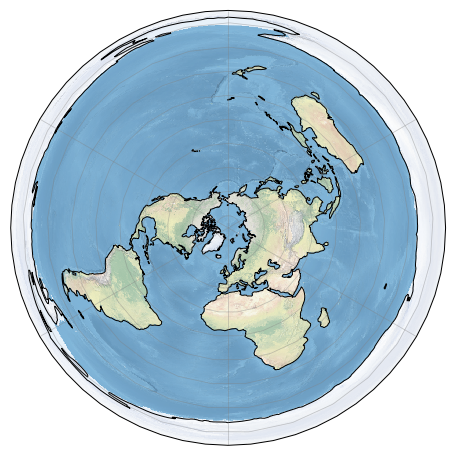

In [36]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(central_latitude=90))
ax.coastlines()
ax.stock_img()
ax.gridlines(color='gray', alpha=0.4)
plt.savefig('azim-eq.png')

In [3]:
import os.path
import urllib.request

URL = 'https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73909/world.topo.bathy.200412.3x5400x2700.jpg'

blue_marble_path = 'blue_marble.jpg'
if not os.path.exists(blue_marble_path):
    urllib.request.urlretrieve(URL, blue_marble_path)

In [4]:
with open(blue_marble_path, 'rb') as fh:
    img = plt.imread(fh)
img.shape

(2700, 5400, 3)

We really don't need all of that resolution, so let's resize it to speed things up a bit.

In [9]:
import skimage.transform

small_blue_marble = skimage.transform.resize(
    img, [600, 1200], anti_aliasing=True, mode='reflect')
small_blue_marble.shape

(600, 1200, 3)

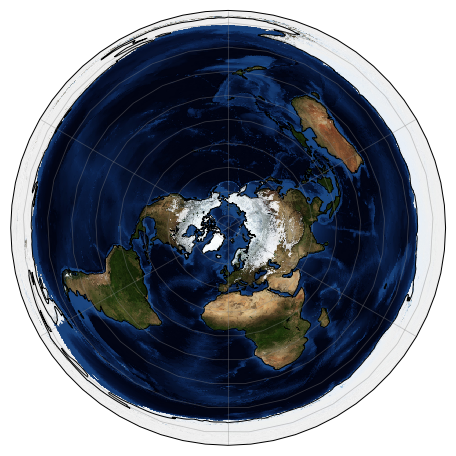

In [16]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(central_latitude=90))
ax.coastlines()
ax.imshow(small_blue_marble,
          origin='upper', transform=ccrs.PlateCarree())
ax.gridlines(color='gray', alpha=0.4)

In [33]:
URL = 'https://github.com/nvkelso/natural-earth-raster/blob/master/50m_rasters/HYP_50M_SR_W/HYP_50M_SR_W.tif?raw=true'

imagery_path = 'HYP_50M_SR_W.tif'
if not os.path.exists(imagery_path):
    urllib.request.urlretrieve(URL, imagery_path)

import skimage.io
    
img = skimage.io.imread(imagery_path)
img.shape

(5400, 10800, 3)

We definitely need to resize that one!

In [34]:
small_img = skimage.transform.resize(
    img, [600, 1200], anti_aliasing=True, mode='reflect')
small_img.shape

(600, 1200, 3)

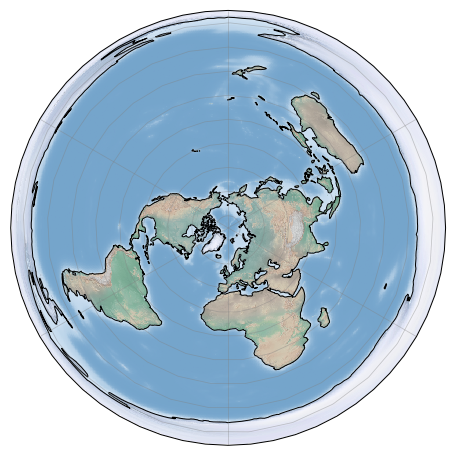

In [35]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(central_latitude=90))
ax.coastlines()
ax.imshow(small_img,
          origin='upper', transform=ccrs.PlateCarree())
ax.gridlines(color='gray', alpha=0.4)